# Task 1
## Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

In [1]:
# Importing the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Load the dataset

In [4]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing of data

In [6]:
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Fare','Cabin','PassengerId'], axis=1)

In [7]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0,'female':1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S':0,'C':1,'Q':2})
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

In [12]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
0,0,3,0,22.0,1,0,0.0,1
1,1,1,1,38.0,1,0,1.0,1
2,1,3,1,26.0,0,0,0.0,0
3,1,1,1,35.0,1,0,0.0,1
4,0,3,0,35.0,0,0,0.0,0


In [13]:
titanic_data['FamilySize'].value_counts()

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [14]:
titanic_data.shape

(891, 8)

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Embarked    889 non-null    float64
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [16]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,889.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,0.362205,0.904602
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,0.636157,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000,10.000000


In [17]:
titanic_data.dropna(inplace=True)

In [18]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
0,0,3,0,22.0,1,0,0.0,1
1,1,1,1,38.0,1,0,1.0,1
2,1,3,1,26.0,0,0,0.0,0
3,1,1,1,35.0,1,0,0.0,1
4,0,3,0,35.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,2.0,5
886,0,2,0,27.0,0,0,0.0,0
887,1,1,1,19.0,0,0,0.0,0
889,1,1,0,26.0,0,0,1.0,0


## Exploratory Data Analysis

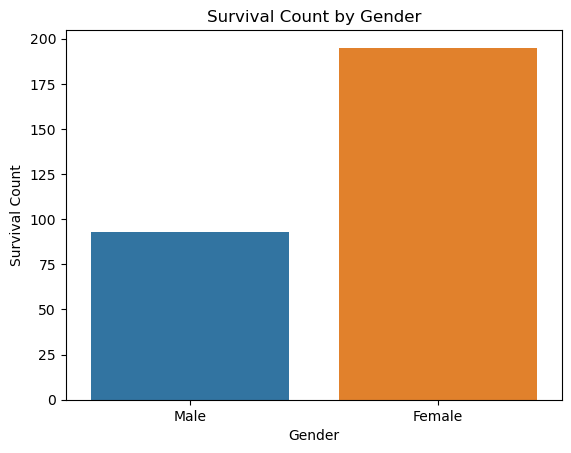

In [19]:
survived_data = titanic_data[titanic_data['Survived'] == 1]

sns.countplot(x='Sex', data=survived_data)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Count')
plt.xticks([0, 1], ['Male', 'Female']) 
plt.show()

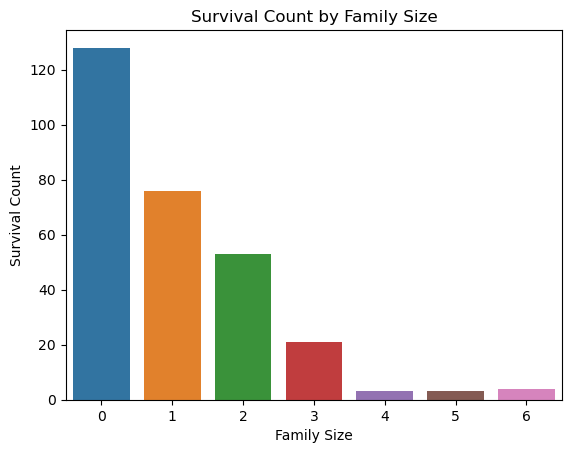

In [20]:
survived_data = titanic_data[titanic_data['Survived'] == 1]

sns.countplot(x='FamilySize', data=survived_data)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Count')
plt.show()

In [21]:
titanic_data['FamilySize'].value_counts()

FamilySize
0    402
1    139
2     93
3     27
5     22
6     12
4     11
7      6
Name: count, dtype: int64

In [22]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
0,0,3,0,22.0,1,0,0.0,1
1,1,1,1,38.0,1,0,1.0,1
2,1,3,1,26.0,0,0,0.0,0
3,1,1,1,35.0,1,0,0.0,1
4,0,3,0,35.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,2.0,5
886,0,2,0,27.0,0,0,0.0,0
887,1,1,1,19.0,0,0,0.0,0
889,1,1,0,26.0,0,0,1.0,0


In [23]:
titanic_data = titanic_data.drop(['SibSp','Parch'], axis=1)

In [24]:
x = titanic_data.drop(['Survived'], axis=1)

In [25]:
x

,Pclass,Sex,Age,Embarked,FamilySize
0,3,0,22.0,0.0,1
1,1,1,38.0,1.0,1
2,3,1,26.0,0.0,0
3,1,1,35.0,0.0,1
4,3,0,35.0,0.0,0
...,...,...,...,...,...
885,3,1,39.0,2.0,5
886,2,0,27.0,0.0,0
887,1,1,19.0,0.0,0
889,1,0,26.0,1.0,0


In [26]:
y = titanic_data['Survived']

In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

## Splitting the Data set into testing and training Dataset

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
x_train

,Pclass,Sex,Age,Embarked,FamilySize
599,1,0,49.0,1.0,1
37,3,0,21.0,0.0,0
555,1,0,62.0,0.0,0
810,3,0,26.0,0.0,0
360,3,0,40.0,0.0,5
...,...,...,...,...,...
194,1,1,44.0,1.0,0
604,1,0,35.0,1.0,0
852,3,1,9.0,1.0,2
735,3,0,28.5,0.0,0


In [31]:
x_test

,Pclass,Sex,Age,Embarked,FamilySize
190,2,1,32.0,0.0,0
292,2,0,36.0,1.0,0
762,3,0,20.0,1.0,0
737,1,0,35.0,1.0,0
812,2,0,35.0,0.0,0
...,...,...,...,...,...
672,2,0,70.0,0.0,0
316,2,1,24.0,0.0,1
135,2,0,23.0,1.0,0
419,3,1,10.0,0.0,2


## Model Evaluation by Cross Validation

In [32]:
models=[LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(),RandomForestClassifier(random_state=42)]

In [33]:
def compare_models_cross_validation():
     for model in models:
            cv_score=cross_val_score(model, x, y, cv=6)
            mean_accuracy=sum(cv_score)/len(cv_score)
            mean_accuracy=mean_accuracy*100
            mean_accuracy=round(mean_accuracy, 2)
            print('Cross Validation accuracies for the',model,'=', cv_score)
            print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
            print('---------------------------------------------------------------')

In [34]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=10000) = [0.75630252 0.81512605 0.79831933 0.80672269 0.76271186 0.80508475]
Acccuracy score of the  LogisticRegression(max_iter=10000) = 79.07 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC() = [0.62184874 0.61344538 0.62184874 0.63865546 0.61864407 0.6440678 ]
Acccuracy score of the  SVC() = 62.64 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.71428571 0.75630252 0.75630252 0.74789916 0.68644068 0.81355932]
Acccuracy score of the  KNeighborsClassifier() = 74.58 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=42) = [0.68067227 0.81512605 0.79831933 0.81512605 0.77966102 0.78813559]
Acccuracy score of the  RandomForestClassifier(random_state=42) = 77.95 %
----------------------------------------

### Use the Logistic Regression Model for this data set because it give good accuracy from others. Now, we apply Hyperparameter tuning by Grid search CV

## Using Hyper Parameter tuning by Grid Search CV

In [35]:
param_grid = {
    'C' : [0.001,0.01,0.1,1,10,100]
}

In [36]:
model1 = LogisticRegression(max_iter = 1000)

In [37]:
grid_search = GridSearchCV(estimator = model1,param_grid=param_grid,cv=5,scoring='accuracy')

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [39]:
grid_search.best_params_

{'C': 0.1}

In [40]:
grid_search.best_score_

0.8031361589815246

In [41]:
y_pred = grid_search.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [42]:
cm = confusion_matrix(y_pred,y_test)

In [43]:
cm

array([[71, 18],
       [14, 40]], dtype=int64)

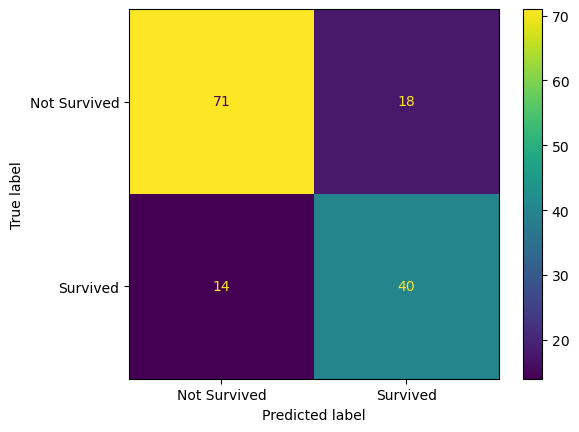

In [44]:
ConfusionMatrixDisplay(cm,display_labels=['Not Survived','Survived']).plot()

In [45]:
report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        89
           1       0.69      0.74      0.71        54

    accuracy                           0.78       143
   macro avg       0.76      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



# Model to predict whether the person will be save from sinking.

In [47]:
def predict_survival(model):
    sex = input("Enter gender (male/female): ").lower()
    age = float(input("Enter age: "))
    pclass = int(input("Enter passenger class (1, 2, or 3): "))
    embarked = input("Enter embarked port (S, C, or Q): ").upper()
    family_size = int(input("Enter family size: "))
    
    sex = 0 if sex == 'male' else 1
    embarked = {'S': 0, 'C': 1, 'Q': 2}[embarked]
    
    # Create DataFrame with consistent order of features
    input_data = pd.DataFrame({'Sex': [sex], 'Age': [age], 'Pclass': [pclass],
                               'Embarked': [embarked], 'FamilySize': [family_size]})
    
    # Reorder columns to match training data
    input_data = input_data[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]
    
    # Make prediction
    prediction = model.predict(input_data)
    
    if prediction[0] == 1:
        print("The model predicts that the passenger will survived.")
    else:
        print("The model predicts that the passenger will not survived.")

# Use the best model (grid_search) to make predictions
predict_survival(grid_search)


Enter gender (male/female): male
Enter age: 34
Enter passenger class (1, 2, or 3): 1
Enter embarked port (S, C, or Q): S
Enter family size: 1
The model predicts that the passenger will not survived.


# The End